In [3]:
# Imports
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from cartopy.geodesic import Geodesic
from shapely.geometry import box

## 1) Data Prep

In [4]:
file_path = 'data_stream-moda_stepType-avgua.nc'
ds = xr.open_dataset(file_path)

# Clipping
ds_pac = ds.sel(
    latitude=slice(-30, 30),
    longitude=slice(120, 280)
)

# Subsets
sst = ds['sst']
u10 = ds['u10']

## 2) Climatology

In [5]:
# Climatological means
sst_clim = sst.sel(valid_time=slice("1940", "1996")).mean(dim="valid_time")
u10_clim = u10.sel(valid_time=slice("1940", "1996")).mean(dim="valid_time")

# 1997 means
sst_1997 = sst.sel(valid_time="1997").mean(dim='valid_time')
u10_1997 = u10.sel(valid_time="1997").mean(dim='valid_time')

In [6]:
# 1997 anomalies
sst_anom_1997 = sst_1997 - sst_clim
u10_anom_1997 = u10_1997 - u10_clim

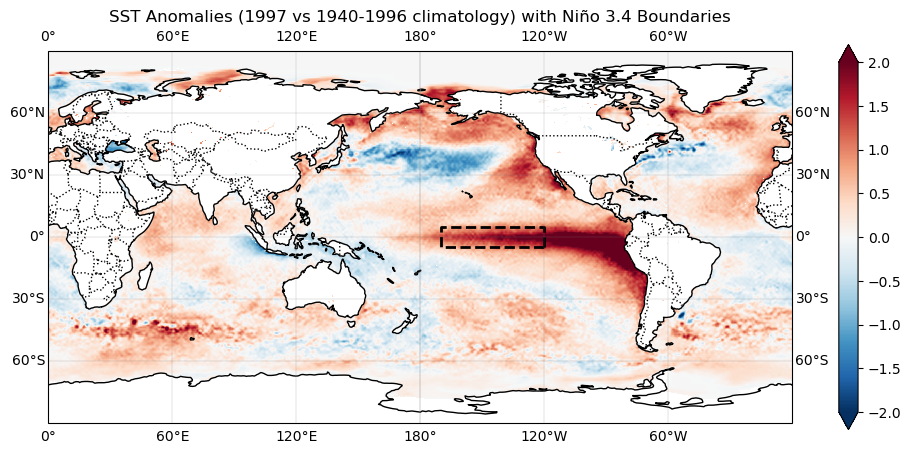

In [7]:
fig = plt.figure(figsize=(12,5))
proj = ccrs.PlateCarree(central_longitude=180)
ax = plt.axes(projection=proj)

ax.coastlines(resolution="110m", linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.set_global()
ax.gridlines(draw_labels=True, linewidth=0.3, color="gray", alpha=0.5)

# SST anomalies
pcm = sst_anom_1997.plot.pcolormesh(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="RdBu_r",
    vmin=-2, vmax=2,
    add_colorbar=True,
    add_labels=False
)

# 3.4 box
lon_min, lon_max = 190, 240
lat_min, lat_max = -5, 5

n34_box = box(lon_min, lat_min, lon_max, lat_max)

ax.add_geometries(
    [n34_box],
    crs=ccrs.PlateCarree(),
    facecolor="none",
    edgecolor="black",
    linewidth=2,
    linestyle="--"
)

plt.title("SST Anomalies (1997 vs 1940-1996 climatology) with Niño 3.4 Boundaries", fontsize=12)
plt.show()

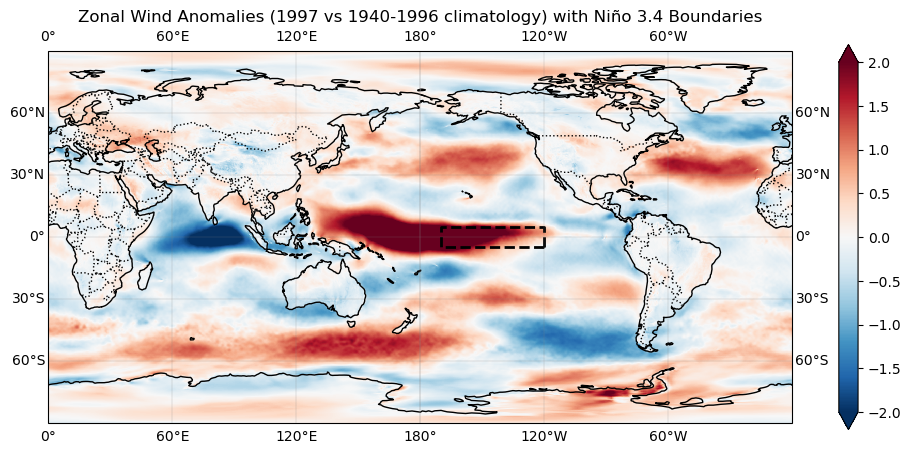

In [8]:
fig = plt.figure(figsize=(12,5))
proj = ccrs.PlateCarree(central_longitude=180)
ax = plt.axes(projection=proj)

ax.coastlines(resolution="110m", linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.set_global()
ax.gridlines(draw_labels=True, linewidth=0.3, color="gray", alpha=0.5)

# u10 anomalies
pcm = u10_anom_1997.plot.pcolormesh(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="RdBu_r",
    vmin=-2, vmax=2,
    add_colorbar=True,
    add_labels=False
)

# 3.4 box
lon_min, lon_max = 190, 240
lat_min, lat_max = -5, 5

n34_box = box(lon_min, lat_min, lon_max, lat_max)

ax.add_geometries(
    [n34_box],
    crs=ccrs.PlateCarree(),
    facecolor="none",
    edgecolor="black",
    linewidth=2,
    linestyle="--"
)

plt.title("Zonal Wind Anomalies (1997 vs 1940-1996 climatology) with Niño 3.4 Boundaries", fontsize=12)
plt.show()

## 3) Anomalies

In [12]:
# Anomalies subset to 3.4 box
sst_anom_n34 = sst.sel(latitude=slice(5, -5), longitude=slice(190, 240)) - sst_clim
sst_nino34 = sst_anom_n34.mean(dim=["latitude", "longitude"])

u10_anom_n34 = u10.sel(latitude=slice(5, -5), longitude=slice(190, 240)) - u10_clim
u10_nino34 = u10_anom_n34.mean(dim=["latitude", "longitude"])

In [13]:
# 5-month centered rolling mean
sst_nino34_smooth = sst_nino34.rolling(valid_time=5, center=True).mean()
u10_nino34_smooth = u10_nino34.rolling(valid_time=5, center=True).mean()

In [14]:
# SST std & mean (1940-1996)
base_period = slice("1940", "1996")
sst_mean_base = sst_nino34_smooth.sel(valid_time=base_period).mean()
sst_std_base  = sst_nino34_smooth.sel(valid_time=base_period).std()

sst_nino34_std = (sst_nino34_smooth - sst_mean_base) / sst_std_base

# u10 std & mean (1940-1996)
base_period = slice("1940", "1996")
u10_mean_base = u10_nino34_smooth.sel(valid_time=base_period).mean()
u10_std_base  = u10_nino34_smooth.sel(valid_time=base_period).std()

u10_nino34_std = (u10_nino34_smooth - u10_mean_base) / u10_std_base

## 4) Plotting

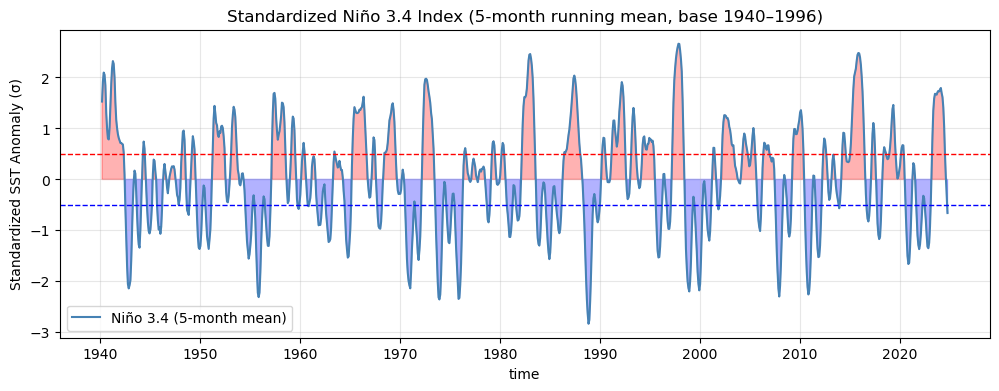

In [28]:
plt.figure(figsize=(12,4))
sst_nino34_std.plot(color="steelblue", lw=1.5, label="Niño 3.4 (5-month mean)")
plt.axhline(0.5, color="r", ls="--", lw=1)
plt.axhline(-0.5, color="b", ls="--", lw=1)
plt.fill_between(sst_nino34_std["valid_time"], 0, sst_nino34_std,
                 where=sst_nino34_std > 0, color="red", alpha=0.3)
plt.fill_between(sst_nino34_std["valid_time"], 0, sst_nino34_std,
                 where=sst_nino34_std < 0, color="blue", alpha=0.3)
plt.title("Standardized Niño 3.4 Index (5-month running mean, base 1940–1996)")
plt.ylabel("Standardized SST Anomaly (σ)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

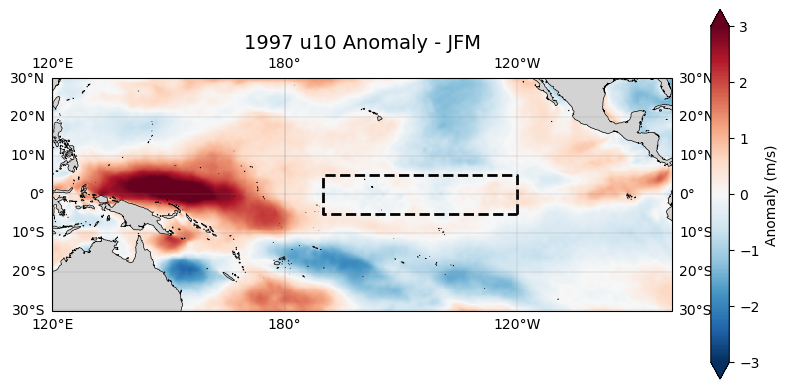

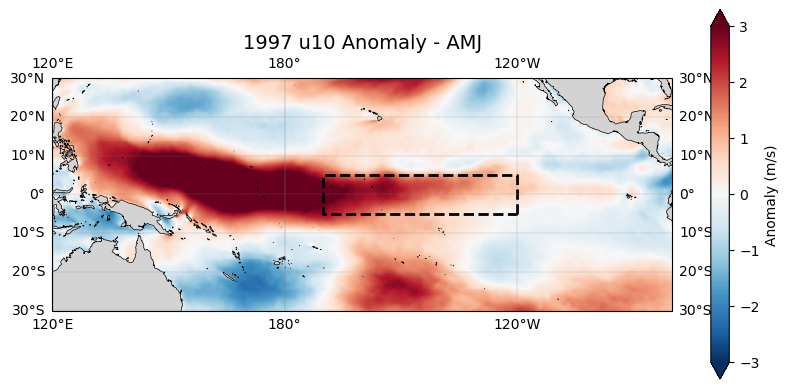

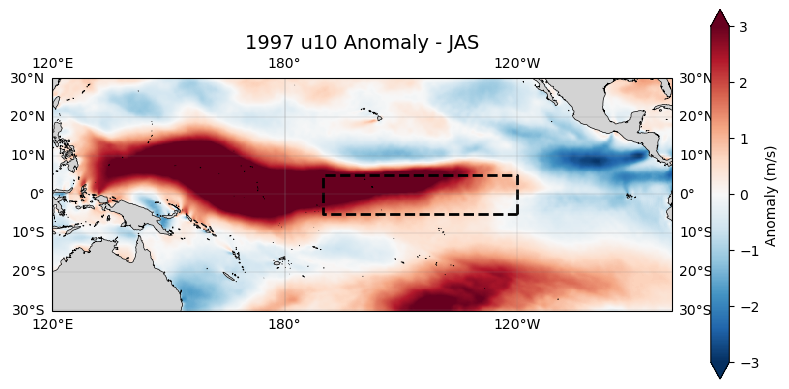

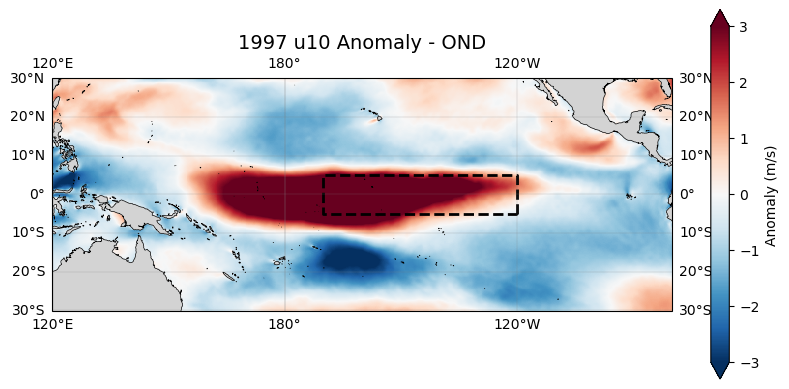

<Figure size 640x480 with 0 Axes>

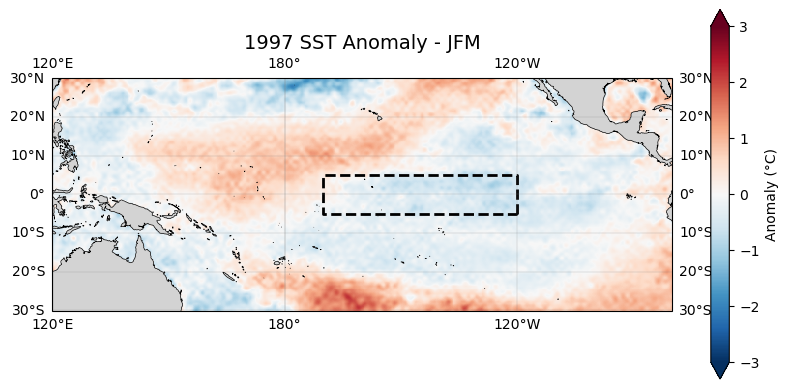

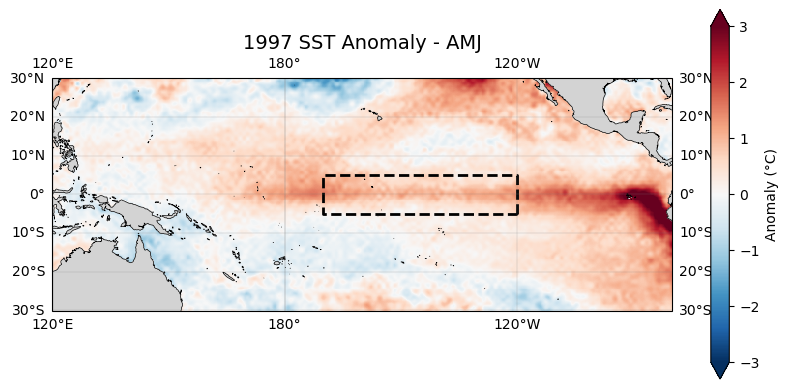

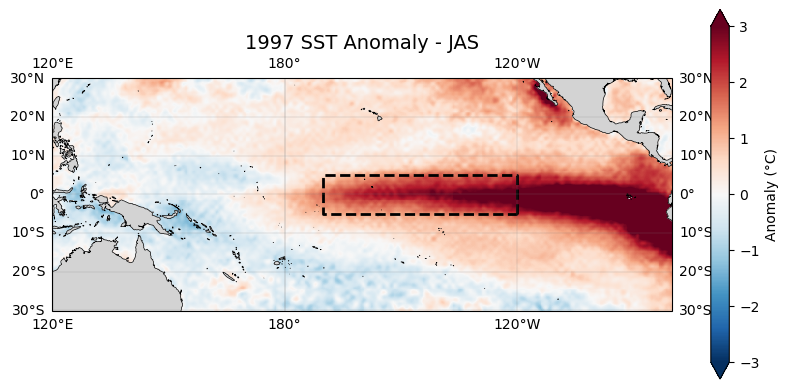

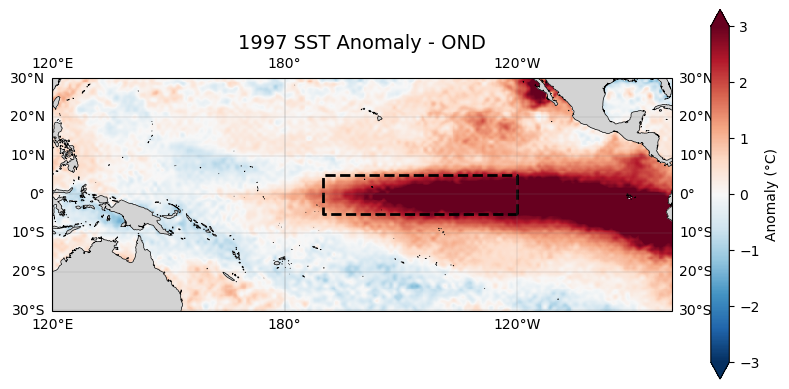

<Figure size 640x480 with 0 Axes>

In [22]:
# Seasonal climatology (1940-1996)
u10_clim = u10.sel(valid_time=slice("1940", "1996"),
                   latitude=slice(30, -30),
                   longitude=slice(120, 280))
sst_clim = sst.sel(valid_time=slice("1940", "1996"),
                   latitude=slice(30, -30),
                   longitude=slice(120, 280))

# Group by month
u10_clim_seas = u10_clim.groupby('valid_time.month').mean('valid_time')
sst_clim_seas = sst_clim.groupby('valid_time.month').mean('valid_time')

# 1997 data
u10_1997 = u10.sel(valid_time="1997",
                   latitude=slice(30, -30),
                   longitude=slice(120, 280))
sst_1997 = sst.sel(valid_time="1997",
                   latitude=slice(30, -30),
                   longitude=slice(120, 280))

# 1997 seasonal means
def get_seasonal_mean(da, months):
    return da.sel(valid_time=da.valid_time.dt.month.isin(months)).mean(dim='valid_time')

seasons = {
    'JFM': [1, 2, 3],
    'AMJ': [4, 5, 6],
    'JAS': [7, 8, 9],
    'OND': [10, 11, 12]
}

u10_1997_seas = {s: get_seasonal_mean(u10_1997, m) for s, m in seasons.items()}
sst_1997_seas = {s: get_seasonal_mean(sst_1997, m) for s, m in seasons.items()}

# Anomalies: 1997 seasonal - clim monthly mean (averaged to season)
u10_anom_1997_seas = {}
sst_anom_1997_seas = {}
for s, months in seasons.items():
    u10_clim_months = u10_clim_seas.sel(month=months).mean('month')
    sst_clim_months = sst_clim_seas.sel(month=months).mean('month')
    u10_anom_1997_seas[s] = u10_1997_seas[s] - u10_clim_months
    sst_anom_1997_seas[s] = sst_1997_seas[s] - sst_clim_months

# Plot function (adapt your existing one)
def plot_anom(da, title, cmap, vmin, vmax, unit):
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
    da.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, vmin=vmin, vmax=vmax,
                       extend='both', cbar_kwargs={'label': f'Anomaly ({unit})', 'shrink': 0.8})
    ax.coastlines(resolution="50m", linewidth=0.5)
    ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)
    ax.gridlines(draw_labels=True, linewidth=0.3, color="gray", alpha=0.5)
    ax.add_geometries([n34_box], crs=ccrs.PlateCarree(), facecolor="none", edgecolor="black", linewidth=2, linestyle="--")
    ax.set_title(title, fontsize=14)
    plt.show()

# Plot u10 1997 seasonal anomalies
for season, da in u10_anom_1997_seas.items():
    plot_anom(da, f"1997 u10 Anomaly - {season}", 'RdBu_r', -3, 3, 'm/s')

# Plot SST 1997 seasonal anomalies
for season, da in sst_anom_1997_seas.items():
    plot_anom(da, f"1997 SST Anomaly - {season}", 'RdBu_r', -3, 3, '°C')

### Discussion
Westerly wind bursts (WWBs) are surges of westerly winds in the equatorial Pacific, typically lasting 5–20 days and occurring about three times per year (Verbickas, 1998). They are most common during boreal winter and spring, and their frequency and intensity increase substantially during El Niño years due to enhanced convection and a more favorable background state.

The El Niño–Southern Oscillation (ENSO) is the dominant mode of interannual climate variability in the tropical Pacific. It is characterized by coupled ocean–atmosphere anomalies, with the warm phase, El Niño, defined by persistent positive SST anomalies in the central and eastern equatorial Pacific, typically monitored through the Oceanic Niño Index (ONI) or the Niño 3.4 index. These anomalies arise from changes in the Walker circulation, thermocline structure, and tropical convection, which in turn loop back to reinforce the anomalous atmospheric and ocean conditions across the region.

In 1997, an extreme El Niño event was observed across the Pacific. To this day, this remains one of the strongest El Niño events on record, with ONI values reaching as high as +2.26°C for the OND season. The conditions underlying the evolution of the 1007 El Niño event are shown by our anomaly maps for that year's SSTs and zonal wind. The zonal wind anomaly plots for the January–March (JFM) season showed an initial weakening of the easterlies followed by a powerful, sustained burst of westerly winds. This initial surge strengthened and persisted throughout the rest of the year, which is then followed by extreme warming throughout the equatorial Pacific (Lian & Chen, 2012) as reflected by our SST anomaly plots.

This finding supports the idea that the 1997 El Niño event was due in part to the sustained WWBs during that year. The wind anomalies rapidly altered the oceanic state. The oceanic response first began with the warming of SSTs across the equatorial Pacific during the April–June (AMJ) and reached their peak in the October–December (OND) season. The WWBs generated Kelvin waves which propagated eastward, deepening the thermocline in the eastern and central Pacific. These Kelvin waves suppressed upwelling and facilitated further surface warming. Lastly, the persistent WWBs enhanced advection, which resulted to the transport of warm anomalies from the western Pacific back into the Niño regions (Menkes et al., 2014). The strengthened westerlies and associated convection further modified surface heat fluxes and reinforced positive SST anomalies. The aforementioned mechanisms are typical to an El Niño event, but reinforced to an extreme state for 1997.

Overall, the 1997 El Niño affirms that WWBs are not only subseasonal disturbances but also modulators and potential initiators of ENSO evolution. Their strength, clustering, and seasonality can significantly alter ocean–atmosphere feedbacks, highlighting the importance of high-frequency wind monitoring in understanding and predicting extreme ENSO events.

#### References
- Eisenman, I., Yu, L., & Tziperman, E. (2005). Westerly wind bursts: ENSO’s tail rather than the dog? Journal of Climate, 18(24), 5224–5238. https://doi.org/10.1175/JCLI3588.1
- Lengaigne, M., Boulanger, J.-P., Menkes, C., Madec, G., Delecluse, P., Guilyardi, E., & Slingo, J. (2003). The March 1997 westerly wind event and the onset of the 1997/98 El Niño: Understanding the role of the atmospheric response. Journal of Climate, 16(20), 3330–3343. https://doi.org/10.1175/1520-0442(2003)016%3C3330:TMWWEA%3E2.0.CO;2
- Lian, T., & Chen, D. (2012). The essential role of early-spring westerly wind bursts in generating the centennial extreme 1997/98 El Niño. Journal of Climate, 25(15), 5567–5576. https://doi.org/10.1175/JCLI-D-21-0010.1
- Menkes, C. E., Lengaigne, M., Vialard, J., Puy, M., Marchesiello, P., Cravatte, S., & Cambon, G. (2014). About the role of Westerly Wind Events in the possible development of an El Niño in 2014. Geophysical Research Letters, 41(16), 5946–5952. https://doi.org/10.1002/2014GL061186
- Verbickas, S. (1998). Westerly wind bursts in the tropical Pacific: A review. Weather and Forecasting, 13(2), 405–412. https://doi.org/10.1002/j.1477-8696.1998.tb06401.x

#### AI Acknowledgement

This exercise was completed as part of the requirements for Meteo203 with the assistance of ChatGPT, particularly in drafting the plot scripts and discussion section. All scripts and information were reviewed, tested, and verified by ARR.